<h1 align="center">Linear Regression Model for Real Estate Price Prediction</h1>

<h3> Project Contents: </h3>
<ol>
  <li>Importing neccessary libraries</li>
  <li>Reading dataset</li>
  <li>Data Cleaning</li>
  <li>Finding out column correlation</li>
  <li>Building a simple linear regression model</li>
  <li>Model assesment</li>
  <li>Outlier handeling</li>
  <li>Model comparison: before and after outlier handling</li>
  <li>Prediction using the model</li>
  <li> Multiple Linear Regression Model Building and Price Predicting using 'sklearn'
</ol>

Dataset:
https://www.kaggle.com/datasets/amitabhajoy/bengaluru-house-price-data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8,6)
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.outliers_influence as oi
import scipy.stats as stats

In [ ]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head(10)
#dataset link: https://www.kaggle.com/datasets/amitabhajoy/bengaluru-house-price-data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [ ]:
df1.shape

(13320, 9)

In [ ]:
df2 = df1[df1['location'] == 'Whitefield'].copy()
df2

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
10,Super built-up Area,18-Feb,Whitefield,3 BHK,NaN,1800,2.0,2.0,70.00
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785,5.0,3.0,295.00
27,Built-up Area,20-Dec,Whitefield,3 BHK,NaN,1610,3.0,2.0,81.00
47,Super built-up Area,20-Sep,Whitefield,2 BHK,Goted U,1459,2.0,1.0,94.82
...,...,...,...,...,...,...,...,...,...
13235,Super built-up Area,Ready To Move,Whitefield,3 BHK,SJces R,1730,3.0,2.0,125.00
13257,Super built-up Area,Ready To Move,Whitefield,3 BHK,SLiritn,1453,2.0,2.0,58.00
13258,Super built-up Area,19-Dec,Whitefield,1 BHK,Oreldhi,877,1.0,1.0,59.00
13299,Super built-up Area,18-Dec,Whitefield,4 BHK,Prtates,2830 - 2882,5.0,0.0,154.50


In [ ]:
df2.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

<h2> Data Cleaning </h2>

In [ ]:
df3 = df2.drop(['area_type', 'availability', 'society'], axis='columns')
df3

,location,size,total_sqft,bath,balcony,price
5,Whitefield,2 BHK,1170,2.0,1.0,38.00
10,Whitefield,3 BHK,1800,2.0,2.0,70.00
11,Whitefield,4 Bedroom,2785,5.0,3.0,295.00
27,Whitefield,3 BHK,1610,3.0,2.0,81.00
47,Whitefield,2 BHK,1459,2.0,1.0,94.82
...,...,...,...,...,...,...
13235,Whitefield,3 BHK,1730,3.0,2.0,125.00
13257,Whitefield,3 BHK,1453,2.0,2.0,58.00
13258,Whitefield,1 BHK,877,1.0,1.0,59.00
13299,Whitefield,4 BHK,2830 - 2882,5.0,0.0,154.50


In [ ]:
df3.isnull().sum()

location       0
size           1
total_sqft     0
bath           6
balcony       26
price          0
dtype: int64

In [ ]:
df4 = df3.dropna()
df4.head(10)

,location,size,total_sqft,bath,balcony,price
5,Whitefield,2 BHK,1170,2.0,1.0,38.00
10,Whitefield,3 BHK,1800,2.0,2.0,70.00
11,Whitefield,4 Bedroom,2785,5.0,3.0,295.00
27,Whitefield,3 BHK,1610,3.0,2.0,81.00
47,Whitefield,2 BHK,1459,2.0,1.0,94.82
52,Whitefield,3 BHK,2010,3.0,2.0,91.00
62,Whitefield,4 Bedroom,5700,5.0,3.0,650.00
112,Whitefield,2 BHK,1116,2.0,1.0,51.91
163,Whitefield,4 Bedroom,4200,4.0,2.0,420.00
202,Whitefield,2 BHK,1225,2.0,2.0,47.60


In [ ]:
df4['size'].unique()

array(['2 BHK', '3 BHK', '4 Bedroom', '4 BHK', '3 Bedroom', '2 Bedroom',
       '5 Bedroom', '1 BHK', '6 Bedroom'], dtype=object)

In [ ]:
df4['no. of rooms'] = df4['size'].apply(lambda x: int(x.split(' ')[0]))

<ipython-input-11-0c74efb7097c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['no. of rooms'] = df4['size'].apply(lambda x: int(x.split(' ')[0]))


In [ ]:
df4.head()

,location,size,total_sqft,bath,balcony,price,no. of rooms
5,Whitefield,2 BHK,1170,2.0,1.0,38.00,2
10,Whitefield,3 BHK,1800,2.0,2.0,70.00,3
11,Whitefield,4 Bedroom,2785,5.0,3.0,295.00,4
27,Whitefield,3 BHK,1610,3.0,2.0,81.00,3
47,Whitefield,2 BHK,1459,2.0,1.0,94.82,2


In [ ]:
df5 =  df4.drop(['size'], axis='columns')
df5.head(10)

,location,total_sqft,bath,balcony,price,no. of rooms
5,Whitefield,1170,2.0,1.0,38.00,2
10,Whitefield,1800,2.0,2.0,70.00,3
11,Whitefield,2785,5.0,3.0,295.00,4
27,Whitefield,1610,3.0,2.0,81.00,3
47,Whitefield,1459,2.0,1.0,94.82,2
52,Whitefield,2010,3.0,2.0,91.00,3
62,Whitefield,5700,5.0,3.0,650.00,4
112,Whitefield,1116,2.0,1.0,51.91,2
163,Whitefield,4200,4.0,2.0,420.00,4
202,Whitefield,1225,2.0,2.0,47.60,2


In [ ]:
df5 = df5.reindex(columns=['location', 'total_sqft', 'no. of rooms', 'bath', 'balcony', 'price'])
df5

,location,total_sqft,no. of rooms,bath,balcony,price
5,Whitefield,1170,2,2.0,1.0,38.00
10,Whitefield,1800,3,2.0,2.0,70.00
11,Whitefield,2785,4,5.0,3.0,295.00
27,Whitefield,1610,3,3.0,2.0,81.00
47,Whitefield,1459,2,2.0,1.0,94.82
...,...,...,...,...,...,...
13235,Whitefield,1730,3,3.0,2.0,125.00
13257,Whitefield,1453,3,2.0,2.0,58.00
13258,Whitefield,877,1,1.0,1.0,59.00
13299,Whitefield,2830 - 2882,4,5.0,0.0,154.50


In [ ]:
def convert_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [ ]:
df6 = df5.copy()
df6['total_sqft'] = df6['total_sqft'].apply(convert_to_num)
df6.head(10)

,location,total_sqft,no. of rooms,bath,balcony,price
5,Whitefield,1170.0,2,2.0,1.0,38.00
10,Whitefield,1800.0,3,2.0,2.0,70.00
11,Whitefield,2785.0,4,5.0,3.0,295.00
27,Whitefield,1610.0,3,3.0,2.0,81.00
47,Whitefield,1459.0,2,2.0,1.0,94.82
52,Whitefield,2010.0,3,3.0,2.0,91.00
62,Whitefield,5700.0,4,5.0,3.0,650.00
112,Whitefield,1116.0,2,2.0,1.0,51.91
163,Whitefield,4200.0,4,4.0,2.0,420.00
202,Whitefield,1225.0,2,2.0,2.0,47.60


In [ ]:
df6.dtypes

location         object
total_sqft      float64
no. of rooms      int64
bath            float64
balcony         float64
price           float64
dtype: object

In [ ]:
df6.isnull().sum()

location        0
total_sqft      1
no. of rooms    0
bath            0
balcony         0
price           0
dtype: int64

In [ ]:
df7 = df6.dropna()
df7.head(10)

,location,total_sqft,no. of rooms,bath,balcony,price
5,Whitefield,1170.0,2,2.0,1.0,38.00
10,Whitefield,1800.0,3,2.0,2.0,70.00
11,Whitefield,2785.0,4,5.0,3.0,295.00
27,Whitefield,1610.0,3,3.0,2.0,81.00
47,Whitefield,1459.0,2,2.0,1.0,94.82
52,Whitefield,2010.0,3,3.0,2.0,91.00
62,Whitefield,5700.0,4,5.0,3.0,650.00
112,Whitefield,1116.0,2,2.0,1.0,51.91
163,Whitefield,4200.0,4,4.0,2.0,420.00
202,Whitefield,1225.0,2,2.0,2.0,47.60


<h2>Column Correlations with Each Other</h2>

In [ ]:
df7.corr()

<ipython-input-20-9d4aff3bdf4a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df7.corr()


,total_sqft,no. of rooms,bath,balcony,price
total_sqft,1.000000,0.701922,0.718416,0.263031,0.864304
no. of rooms,0.701922,1.000000,0.905023,0.297173,0.648972
bath,0.718416,0.905023,1.000000,0.254377,0.657697
balcony,0.263031,0.297173,0.254377,1.000000,0.210080
price,0.864304,0.648972,0.657697,0.210080,1.000000


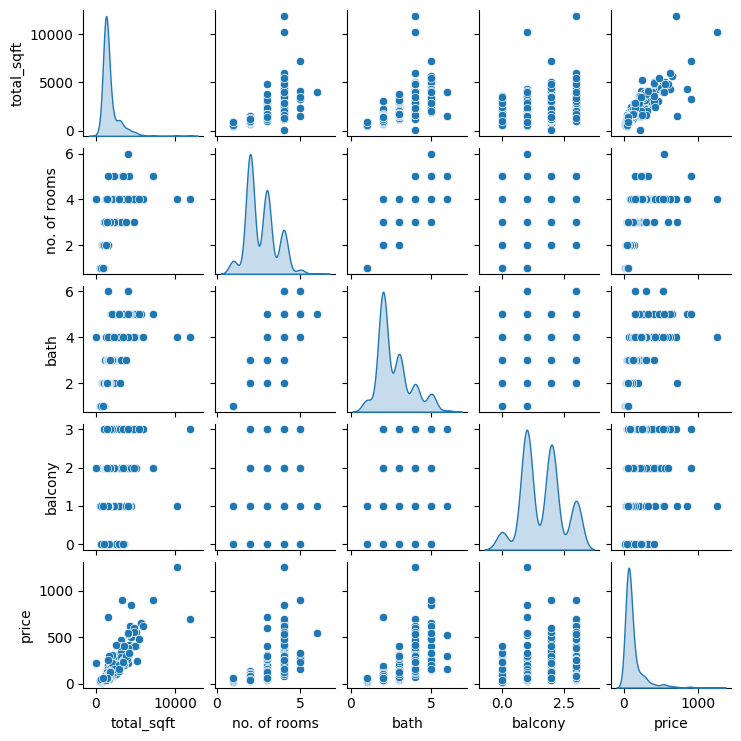

In [ ]:
sns.pairplot(df7, diag_kind='kde', height=1.5)

<h1> Model Building: Simple Linear Regression Model </h1>

In [ ]:
df8 = df7.copy()
df8

,location,total_sqft,no. of rooms,bath,balcony,price
5,Whitefield,1170.0,2,2.0,1.0,38.00
10,Whitefield,1800.0,3,2.0,2.0,70.00
11,Whitefield,2785.0,4,5.0,3.0,295.00
27,Whitefield,1610.0,3,3.0,2.0,81.00
47,Whitefield,1459.0,2,2.0,1.0,94.82
...,...,...,...,...,...,...
13235,Whitefield,1730.0,3,3.0,2.0,125.00
13257,Whitefield,1453.0,3,2.0,2.0,58.00
13258,Whitefield,877.0,1,1.0,1.0,59.00
13299,Whitefield,2856.0,4,5.0,0.0,154.50


<h3>Checking the Non-linearity of the Relationship</h3>

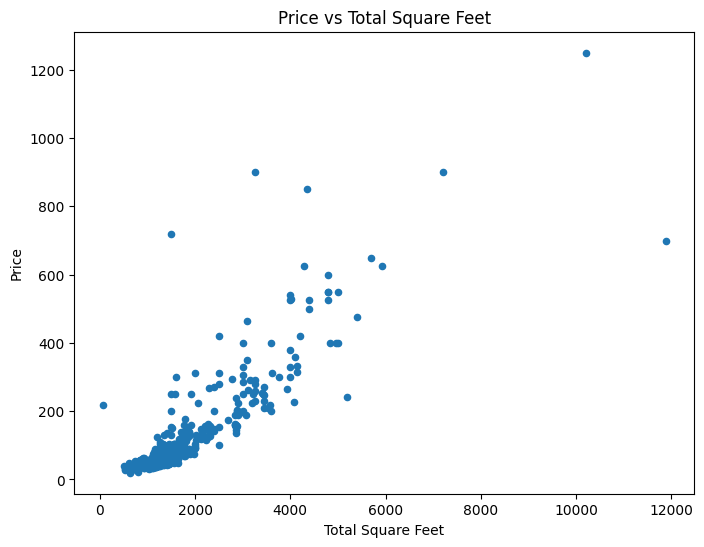

In [ ]:
df8.plot(x='total_sqft', y='price', kind='scatter')
plt.xlabel('Total Square Feet')
plt.ylabel('Price')
plt.title('Price vs Total Square Feet')
plt.show()

<h3> Model Building and Correlation to Error Term </h3>

In [ ]:
y = df8['price']
x = df8[['total_sqft']]

In [ ]:
model = smf.ols('y ~ x', df8).fit()

In [ ]:
df8['predicted'] = model.predict(df8)
df8['resid'] = model.resid
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1509.
Date:                Fri, 13 Oct 2023   Prob (F-statistic):          1.25e-154
Time:                        08:31:23   Log-Likelihood:                -2900.2
No. Observations:                 513   AIC:                             5804.
Df Residuals:                     511   BIC:                             5813.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -62.6786      5.667    -11.061      0.0

In [ ]:
print(df8)

         location  total_sqft  no. of rooms  bath  balcony   price  \
5      Whitefield      1170.0             2   2.0      1.0   38.00   
10     Whitefield      1800.0             3   2.0      2.0   70.00   
11     Whitefield      2785.0             4   5.0      3.0  295.00   
27     Whitefield      1610.0             3   3.0      2.0   81.00   
47     Whitefield      1459.0             2   2.0      1.0   94.82   
...           ...         ...           ...   ...      ...     ...   
13235  Whitefield      1730.0             3   3.0      2.0  125.00   
13257  Whitefield      1453.0             3   2.0      2.0   58.00   
13258  Whitefield       877.0             1   1.0      1.0   59.00   
13299  Whitefield      2856.0             4   5.0      0.0  154.50   
13315  Whitefield      3453.0             5   4.0      0.0  231.00   

        predicted      resid  
5       60.616841 -22.616841  
10     127.006703 -57.006703  
11     230.806727  64.193273  
27     106.984364 -25.984364  
47  

<h3>Q-Q Plot</h3>

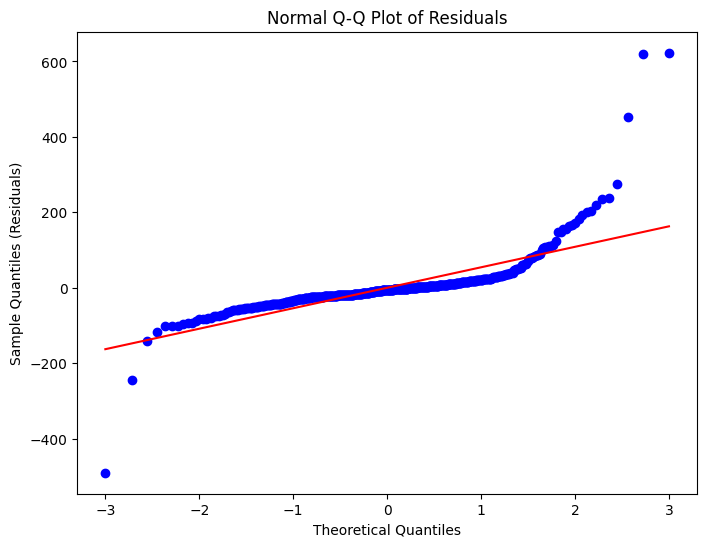

In [ ]:
stats.probplot(df8['resid'], dist="norm", plot=plt)
plt.title("Normal Q-Q Plot of Residuals")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles (Residuals)")
plt.show()

<h3>Homoscedasticity</h3>

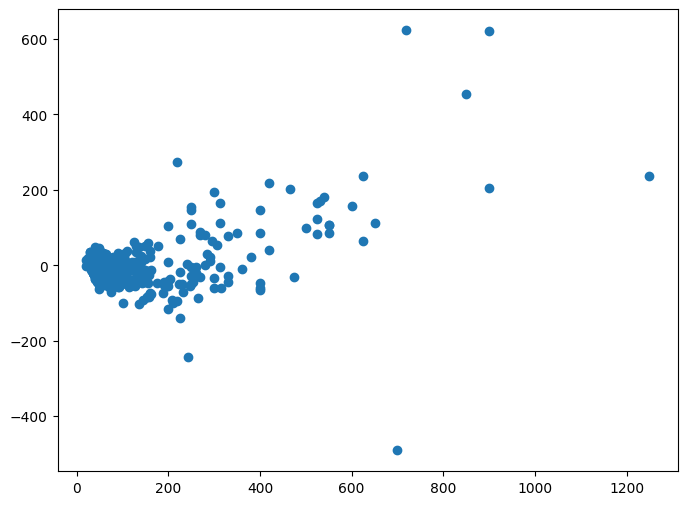

In [ ]:
plt.scatter(y, df8.resid)

<h2> Outlier Handling </h2>

<h4>Outlier Removal using Cook's Distance </h4>

In [ ]:
new_model = sm.regression.linear_model.OLS(y, x).fit()

In [ ]:
original_length = len(df8)
influence = new_model.get_influence()
influence_list = influence.cooks_distance[0]
influence_df = pd.DataFrame(influence_list, columns=["influence"])
influence_df.index = df8.index
cooks_df = df8.merge(influence_df, left_index=True, right_index=True)
cooks_threshold = 4/original_length
cooks_outliers = cooks_df[cooks_df["influence"] > cooks_threshold]
print("Removed:", len(cooks_outliers))
print(f"This is {len(cooks_outliers) / original_length * 100}% of our dataset")

Removed: 26
This is 5.0682261208577% of our dataset


In [ ]:
print(new_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.826
Model:                            OLS   Adj. R-squared (uncentered):              0.825
Method:                 Least Squares   F-statistic:                              2428.
Date:                Fri, 13 Oct 2023   Prob (F-statistic):                   1.90e-196
Time:                        09:10:32   Log-Likelihood:                         -2955.2
No. Observations:                 513   AIC:                                      5912.
Df Residuals:                     512   BIC:                                      5917.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

<h3>Residual vs Fitted Plot</h3>

Text(0, 0.5, 'Residuals')

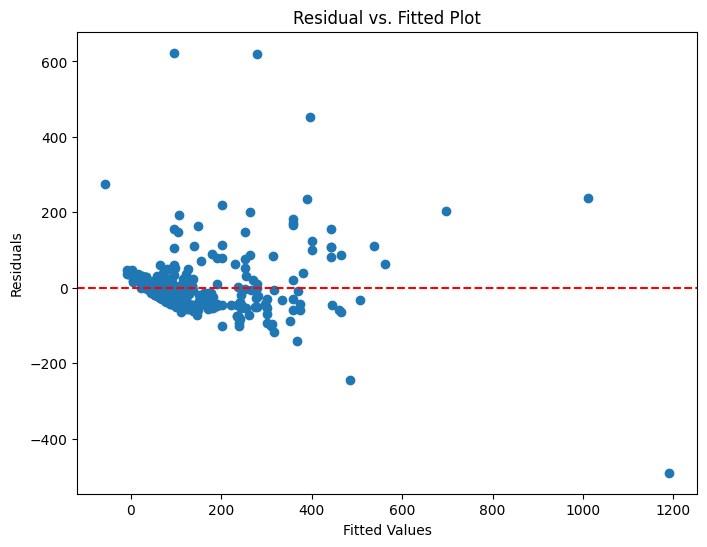

In [ ]:
plt.scatter(df8.predicted, df8.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual vs. Fitted Plot")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")

<h2>Price Prediction using Simple LR Model </h2>

In [ ]:
total_sqft = 1500
new_data = [[total_sqft]]
predicted_price = new_model.predict(new_data)
print("Predicted Price:", predicted_price[0])

Predicted Price: 120.15283773562493


<h2>Multiple Linear Regression Model Building and Price Predicting using 'sklearn'</h4>

In [ ]:
df9 = df7.copy()
df9

,location,total_sqft,no. of rooms,bath,balcony,price
5,Whitefield,1170.0,2,2.0,1.0,38.00
10,Whitefield,1800.0,3,2.0,2.0,70.00
11,Whitefield,2785.0,4,5.0,3.0,295.00
27,Whitefield,1610.0,3,3.0,2.0,81.00
47,Whitefield,1459.0,2,2.0,1.0,94.82
...,...,...,...,...,...,...
13235,Whitefield,1730.0,3,3.0,2.0,125.00
13257,Whitefield,1453.0,3,2.0,2.0,58.00
13258,Whitefield,877.0,1,1.0,1.0,59.00
13299,Whitefield,2856.0,4,5.0,0.0,154.50


In [ ]:
df9.corr()

<ipython-input-54-b67c4580557b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df9.corr()


,total_sqft,no. of rooms,bath,balcony,price
total_sqft,1.000000,0.701922,0.718416,0.263031,0.864304
no. of rooms,0.701922,1.000000,0.905023,0.297173,0.648972
bath,0.718416,0.905023,1.000000,0.254377,0.657697
balcony,0.263031,0.297173,0.254377,1.000000,0.210080
price,0.864304,0.648972,0.657697,0.210080,1.000000


In [ ]:
y2 = df9['price']
x2 = df9[['total_sqft', 'balcony']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x2, y2, test_size=0.3, random_state=10)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
sklearn_model = LinearRegression()
sklearn_model.fit(X_train, Y_train)
sklearn_model.score(X_test, Y_test)

0.782566572500595

In [ ]:
total_sqft = 1500
balcony = 2
new_data = [[total_sqft, balcony]]
predicted_price = sklearn_model.predict(new_data)
print("Predicted Price:", predicted_price[0])

Predicted Price: 96.03184605358751


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
